Generates Fig.3 and extended data fig. 3

#### Load Libraries

In [38]:
library(plyr)
library(tidyverse)
library(ggpubr)
library(rcompanion)
# library(ggmosaic)
library(caret)
library(ggthemes)
library(gridExtra)  
library(extrafont)
library(ggrepel)
library(stringr)
library(svglite)

In [ ]:
# loadfonts(device = "all")
# loadfonts(device = "postscript")

In [ ]:
# Using Arial in
# R https://fromthebottomoftheheap.net/2013/09/09/preparing-figures-for-plos-one-with-r/

In [5]:
source("utils/plot_theme.r")

### Read in merged data

In [11]:
Omics_analysis_all_DF = read_delim(file = "data/omics_LLM_Enrichr_simVals_analyses_DF.tsv", delim = "\t") 

Rows: 250 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): Source, GeneSetID, GeneSetName, GeneList, LLM Name, LLM Analysis, ...
dbl (17): ...1, index, n_Genes, Score, Rank, P-value, Adjusted P-value, Orig...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
Omics_analysis_DF = Omics_analysis_all_DF %>%
subset(between(x = n_Genes, left = 3, right = 100))

In [13]:
dim(Omics_analysis_DF)

[1] 194  28

In [59]:
48 + 25 + 60

[1] 133

In [16]:
table(Omics_analysis_DF$Source)


        Disease Gene Expression          MSigDB            NeST    Perturbation 
             60              25              13              48              48 

In [8]:
Omics_analysis_DF %>% colnames()

[1] "...1"                    "index"                  
 [3] "Source"                  "GeneSetID"              
 [5] "GeneSetName"             "GeneList"               
 [7] "n_Genes"                 "LLM Name"               
 [9] "LLM Analysis"            "Score"                  
[11] "Rank"                    "Overlap"                
[13] "P-value"                 "Adjusted P-value"       
[15] "Enrichr genes"           "GO term"                
[17] "GO ID"                   "OriginalIndex"          
[19] "LLM_name_human_name_sim" "GO_term_human_name_sim" 
[21] "winner"                  "log2_n_Genes"           
[23] "log2_rat_LLM_GO"         "diff_LLM_GO"            
[25] "n_overlap_Enrichr"       "perc_overlap_Enrichr"   
[27] "n_overlap_LLM"           "perc_overlap_LLM"

In [17]:
dim(Omics_analysis_DF)

[1] 194  28

In [18]:
geneSetsToLabel = c("Histone Modification", "Hedgehog Signaling")
#, "Notch Signaling",
#                    "Ubiquitin regulation of p53 activity", "p53 regulation of cell cycle", 
#                   "Pancreas Beta Cells", "Interferon Alpha Response", "RAS-RAF-MAPK", 
#                    "ATM-independent DNA repair", "Estrogen Response Early", "Nucleus" )

In [19]:
bioAcronymsList = c("RAS-RAF-MAPK") # based only in genesets to be labeled

In [20]:
Omics_analysis_DF = Omics_analysis_DF %>%
mutate(labelName = ifelse(tolower(`GeneSetName`) %in% tolower(geneSetsToLabel), 
                          ifelse(`GeneSetName` %in% bioAcronymsList,`GeneSetName`, str_to_sentence(`GeneSetName`)),
                         ""))

In [21]:
Omics_analysis_DF$labelName

[1] ""                     ""                     ""                    
  [4] ""                     ""                     ""                    
  [7] ""                     ""                     ""                    
 [10] ""                     ""                     ""                    
 [13] ""                     ""                     ""                    
 [16] ""                     ""                     ""                    
 [19] ""                     ""                     ""                    
 [22] ""                     ""                     ""                    
 [25] ""                     ""                     ""                    
 [28] ""                     ""                     ""                    
 [31] ""                     ""                     ""                    
 [34] ""                     ""                     ""                    
 [37] ""                     ""                     ""                    
 [40] ""                     ""                     ""                    
 [43] ""                     ""                     ""                    
 [46] ""                     ""                     ""                    
 [49] ""                     ""                     ""                    
 [52] ""                     ""                     ""                    
 [55] ""                     ""                     ""                    
 [58] ""                     ""                     ""                    
 [61] ""                     ""                     ""                    
 [64] ""                     ""                     ""                    
 [67] ""                     ""                     ""                    
 [70] ""                     ""                     ""                    
 [73] ""                     ""                     ""                    
 [76] ""                     ""                     ""                    
 [79] ""                     ""                     ""                    
 [82] ""                     ""                     ""                    
 [85] ""                     ""                     ""                    
 [88] ""                     "Hedgehog signaling"   ""                    
 [91] ""                     ""                     ""                    
 [94] ""                     ""                     ""                    
 [97] ""                     ""                     ""                    
[100] ""                     ""                     ""                    
[103] ""                     ""                     ""                    
[106] ""                     ""                     ""                    
[109] ""                     ""                     ""                    
[112] ""                     ""                     ""                    
[115] ""                     ""                     ""                    
[118] ""                     ""                     ""                    
[121] ""                     ""                     ""                    
[124] ""                     "Histone modification" ""                    
[127] ""                     ""                     ""                    
[130] ""                     ""                     ""                    
[133] ""                     ""                     ""                    
[136] ""                     ""                     ""                    
[139] ""                     ""                     ""                    
[142] ""                     ""                     ""                    
[145] ""                     ""                     ""                    
[148] ""                     ""                     ""                    
[151] ""                     ""                     ""                    
[154] ""                     ""                     ""                    
[157] ""                     ""                     ""                    
[160] ""                   

In [22]:
Omics_analysis_DF %>%
subset(tolower(labelName) %in% tolower(geneSetsToLabel)) %>%
select(c("labelName", "LLM Name", "GO term"))

labelName,LLM Name,GO term
<chr>,<chr>,<chr>
Hedgehog signaling,Neural Development and Axon Guidance,Nervous System Development
Histone modification,Chromatin Modification and Transcriptional Regulation,Negative Regulation Of Transcription By RNA Polymerase II


In [23]:
Omics_analysis_long_DF = Omics_analysis_DF[,c("labelName", "GeneSetName", "LLM_name_human_name_sim",
                                              "GO_term_human_name_sim", "log2_n_Genes", "Source")] %>%
pivot_longer(cols = c("LLM_name_human_name_sim" ,"GO_term_human_name_sim"),
             names_to = "sim_option",
             values_to = "sim_value")

In [24]:
if (!dir.exists("figures")){
    dir.create("figures")}

#### Genes captured figures

In [25]:
merged_analysis_long_percOverlap_DF = Omics_analysis_DF[,c("labelName", "GeneSetName", "log2_n_Genes",
                                                           "perc_overlap_LLM" ,"perc_overlap_Enrichr", "Source")] %>%
pivot_longer(cols = c("perc_overlap_LLM" ,"perc_overlap_Enrichr"),
             names_to = "analysisType",
             values_to = "perc_overlap")

In [26]:
my_comparisonsOverlap <- list( c("perc_overlap_LLM", "perc_overlap_Enrichr") )


In [27]:
pos <- position_jitter( seed = 1, width = 0.2)

In [28]:
labelNameStr =  merged_analysis_long_percOverlap_DF$labelName;

In [29]:
merged_analysis_long_percOverlap_DF$Source %>% unique()

[1] "Disease"         "Gene Expression" "MSigDB"          "NeST"           
[5] "Perturbation"

In [30]:
for (sourceStr in c("MSigDB", "NeST", "Disease", "Gene Expression", "Perturbation")){
    
    print(sourceStr)
    
    sourceSubset = merged_analysis_long_percOverlap_DF %>%
    subset(Source == sourceStr)
    
    print("LLM")
    sourceSubset %>%
    subset(analysisType == "perc_overlap_LLM") %>%
    pull(perc_overlap) %>%
    summary() %>% print()
    
    print("GO")
    sourceSubset %>%
    subset(analysisType == "perc_overlap_Enrichr") %>%
    pull(perc_overlap) %>%
    summary() %>% print()
    
    print("============")
    }
 

[1] "MSigDB"
[1] "LLM"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.99   38.54   50.00   53.31   57.14   96.88 
[1] "GO"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.818  22.500  30.556  27.766  34.021  49.425 
[1] "============"
[1] "NeST"
[1] "LLM"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.55  100.00  100.00   96.96  100.00  100.00 
[1] "GO"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.43   44.05   64.58   63.15   80.00  100.00 
[1] "============"
[1] "Disease"
[1] "LLM"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.33  100.00  100.00   94.83  100.00  100.00 
[1] "GO"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.667  26.705  42.875  45.285  66.667 100.000 
[1] "============"
[1] "Gene Expression"
[1] "LLM"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.09   93.33   96.67   87.72  100.00  100.00 
[1] "GO"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   8.333  13.636  24.327  31.250 100.000 
[1] "============"
[1] 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

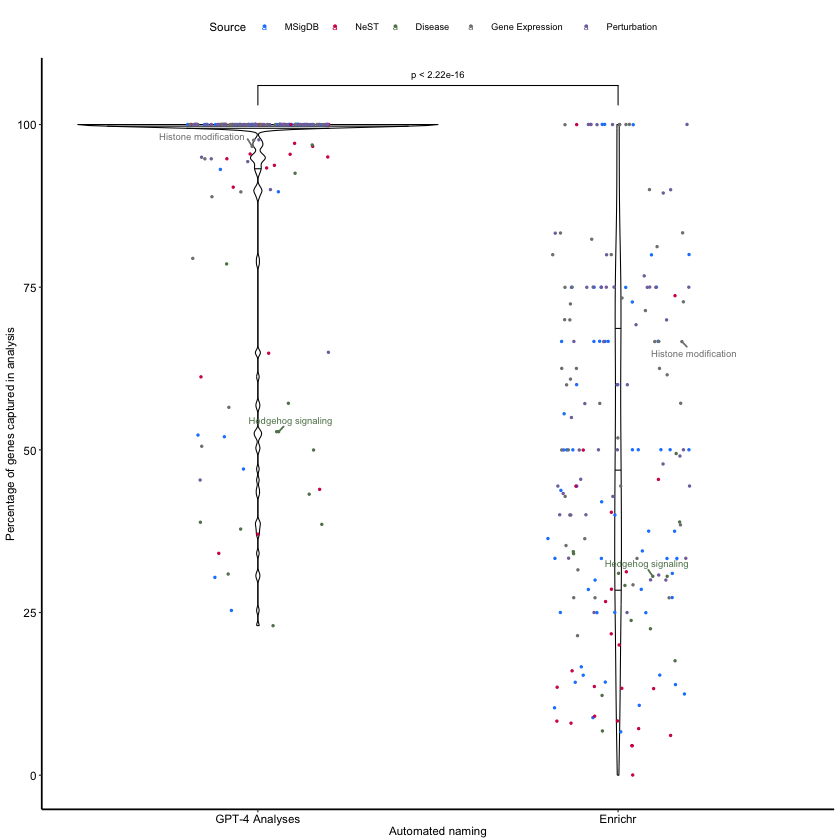

In [34]:
boxPlot_overlap_new_plot = merged_analysis_long_percOverlap_DF %>%
    ggviolin(size = 0.3, x = "analysisType", y = "perc_overlap", 
            draw_quantiles = c(0.25, 0.5, 0.75),
            ylab = "Percentage of genes captured in analysis" , xlab = "Automated naming",
            trim  = TRUE, ylim = c(0, 105)) +
    geom_jitter( aes(color = factor(Source)), size = 0.3, position = position_jitter(seed = 1, width = 0.2)) +
    geom_text_repel(aes(color = factor(Source)), position = pos, label = labelNameStr, 
                    max.overlaps = 200, size = 2, min.segment.length = 0.01) +
  scale_colour_manual(name="Source", labels = c("MSigDB", "NeST", "Disease", "Gene Expression", "Perturbation"), 
                      values=c("#1A85FF", "#D41159", "#5f8159", "#808080", "#8271ab"))+
scale_x_discrete(labels=c("perc_overlap_LLM" = "GPT-4 Analyses", "perc_overlap_Enrichr" = "Enrichr")) + 
stat_compare_means(comparisons = my_comparisonsOverlap,label.y = 101, 
                   label = "p.format", size = 2)  +
theme_pubr_SA(base_family = "Arial", legend = "top") 
   

boxPlot_overlap_new_plot

In [32]:
merged_analysis_long_percOverlap_DF %>%
subset(analysisType == "perc_overlap_LLM") %>%
subset(Source == "NeST") %>%
pull(perc_overlap) %>%
summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.55  100.00  100.00   96.96  100.00  100.00 

In [53]:
ggsave(filename = "figures/fig3_overlap_revision_3_100.png", plot = boxPlot_overlap_new_plot, height = 4, width = 4)


In [54]:
ggsave(file="figures/fig3_overlap_revision_3_100.svg", plot=boxPlot_overlap_new_plot, height = 4, width = 4)


In [ ]:
colnames(merged_analysis_long_DF)

### Semantic similarity plot

In [40]:
posSimSem <- position_jitter(seed = 1, width = 0.2)

In [41]:
labelNameStrSimSem =  Omics_analysis_long_DF$labelName;

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

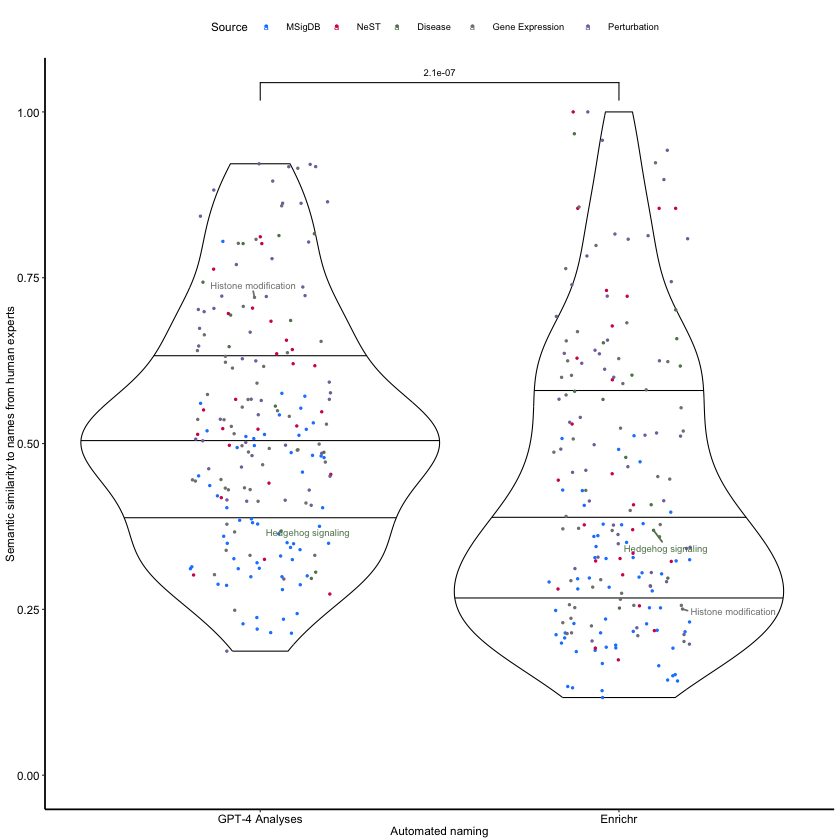

In [42]:
my_comparisons_semsim = list(c("LLM_name_human_name_sim", "GO_term_human_name_sim"))

boxPlot_simplist_2_plot = Omics_analysis_long_DF %>%
    ggviolin(size = 0.3, x = "sim_option", y = "sim_value",
            draw_quantiles = c(0.25, 0.5, 0.75),
            ylab  = "Semantic similarity to names from human experts",
             xlab = "Automated naming", trim = TRUE, ylim = c(0, 1.03))+
    geom_jitter(aes(color = factor(Source)),size = 0.3, position = position_jitter(seed = 1, width = 0.2)) +
geom_text_repel(aes(color = factor(Source)), position = posSimSem, label = labelNameStrSimSem, 
                    max.overlaps = 200, size = 2, min.segment.length = 0.01)+
scale_colour_manual(name="Source", labels = c("MSigDB", "NeST", "Disease", "Gene Expression", "Perturbation"), 
                     values=c("#1A85FF", "#D41159", "#5f8159", "#808080", "#8271ab")) + 
scale_x_discrete(labels=c("LLM_name_human_name_sim" = "GPT-4 Analyses", "GO_term_human_name_sim" = "Enrichr")) +
stat_compare_means(comparisons = my_comparisons_semsim, 
                   label.y = 1, label = "p.format", size = 2) + 
theme_pubr_SA(base_family = "Arial", legend = "top")

boxPlot_simplist_2_plot

#

In [43]:
for (sourceStr in c("MSigDB", "NeST", "Disease", "Gene Expression", "Perturbation")){
    
    print(sourceStr)
    
    sourceSubset = Omics_analysis_long_DF %>%
    subset(Source == sourceStr)
    
    print("LLM_name_human_name_sim")
    sourceSubset %>%
    subset(sim_option == "LLM_name_human_name_sim") %>%
    pull(sim_value) %>%
    summary() %>% print()
    
    print("GO_term_human_name_sim")
    sourceSubset %>%
    subset(sim_option == "GO_term_human_name_sim") %>%
    pull(sim_value) %>%
    summary() %>% print()
    
    print("============")
    }
 

[1] "MSigDB"
[1] "LLM_name_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2967  0.4868  0.6461  0.5926  0.7433  0.8164 
[1] "GO_term_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2520  0.4078  0.5788  0.5499  0.6519  0.9671 
[1] "============"
[1] "NeST"
[1] "LLM_name_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2487  0.4331  0.5204  0.5312  0.6179  0.9151 
[1] "GO_term_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2016  0.2632  0.3946  0.4422  0.5928  0.9233 
[1] "============"
[1] "Disease"
[1] "LLM_name_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2141  0.3113  0.3695  0.3936  0.4883  0.8048 
[1] "GO_term_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1171  0.1953  0.2523  0.2736  0.3323  0.5118 
[1] "============"
[1] "Gene Expression"
[1] "LLM_name_human_name_sim"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2731  0.4974  0.5507  0.5636  0.6558

In [ ]:
?summary

In [55]:
ggsave(filename = "figures/fig3_semsim_revision_3_100.png", plot = boxPlot_simplist_2_plot, height = 4, width = 4)
ggsave(file="figures/fig3_semsim_revision_3_100.svg", plot=boxPlot_simplist_2_plot, height = 4, width = 4)


### Plot distribution of number of genes faceted by DataSet

In [45]:
nGenes_count_Hist = gghistogram(data = Omics_analysis_DF, x = "n_Genes", 
                                y = "count", bins = 100) %>%
 ggpar(size = 0.3,
     font.x = c(16),
     font.y = c(16),
     xlab = "Number of genes",
     ylab = "Count") +
theme_pubr_SA(base_family = "Arial", legend = "none")



Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

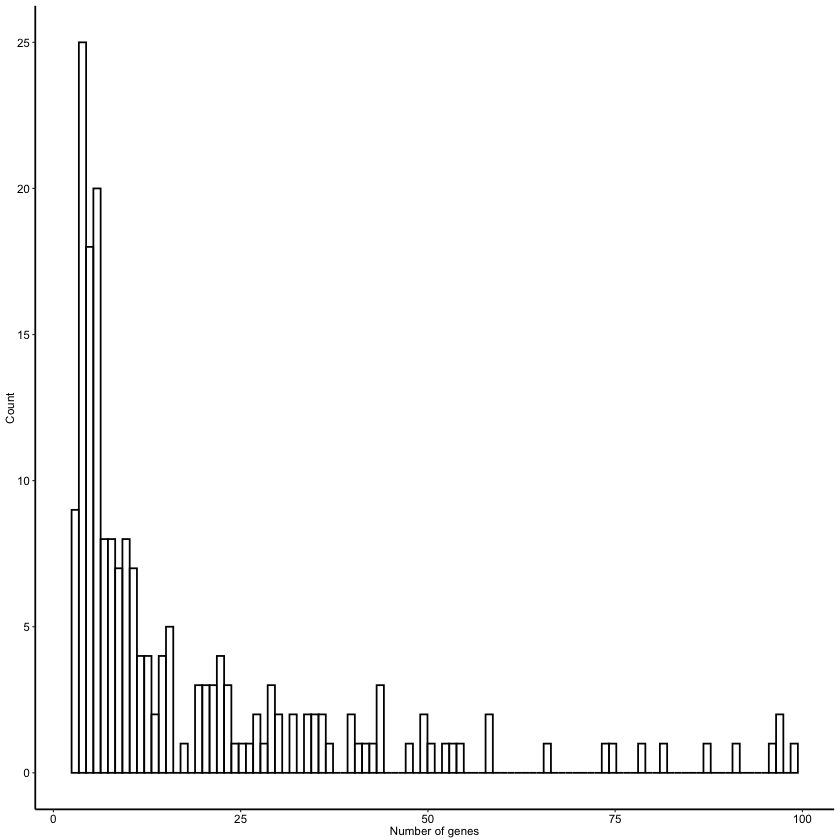

In [46]:
nGenes_count_Hist

In [56]:
ggsave(filename = "figures/Omics_geneSetSizes_revision_3_100.png", plot = nGenes_count_Hist, units = "in", 
       width = 6, height = 4, dpi = 600)


In [58]:
ggsave(filename = "figures/Omics_geneSetSizes_revision_3_100.svg", plot = nGenes_count_Hist, units = "in", 
       width = 6, height = 4, dpi = 600)
